# Import Data

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('./WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


from the info we can see,
    <li> there are no null values</li>
    <li> there are 1 float, 2 int and 18 other object columns</li>

**What do we do next?**
    <li> remove `customerId` column, as won't be needing the customerID column as it will have no meaning in our data</li>
    <li> transform object column to numerical column</li>

In [4]:
# check if there are null values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

first, let's remove the column customerID

In [5]:
df.drop(columns=['customerID'], axis=0, inplace=True)

In [6]:
obj_dat = df.select_dtypes(include='object')
obj_col = obj_dat.columns
obj_unique_count = []

for columns in obj_dat.columns:
    obj_unique_count.append(df[columns].nunique())

In [7]:
ndf = pd.DataFrame(obj_col, obj_unique_count)
ndf

,0
2,gender
2,Partner
2,Dependents
2,PhoneService
3,MultipleLines
3,InternetService
3,OnlineSecurity
3,OnlineBackup
3,DeviceProtection
3,TechSupport


In [8]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [9]:
# check if there are null values
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [10]:
df.dropna(axis=0, inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


In [12]:
X = df.drop(columns='Churn', axis=0)
y = df['Churn']

In [13]:
mapping_yesno = {'Yes': 0, 'No':1}
y = y.map(mapping_yesno)

In [14]:
columns_to_encode = X.select_dtypes(include='object').columns
columns_to_encode

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [15]:
from util import encode_categorical_columns

X_encoded = encode_categorical_columns(X, columns_to_encode)

In [16]:
X_encoded

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,...,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,1.0,29.85,29.85,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,34.0,56.95,1889.50,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,2.0,53.85,108.15,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,45.0,42.30,1840.75,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,2.0,70.70,151.65,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3826,NaN,NaN,NaN,NaN,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4380,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
5218,NaN,NaN,NaN,NaN,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6670,NaN,NaN,NaN,NaN,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
X_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 6754
Data columns (total 40 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7032 non-null   float64
 1   tenure                                   7032 non-null   float64
 2   MonthlyCharges                           7032 non-null   float64
 3   TotalCharges                             7032 non-null   float64
 4   gender_Male                              7032 non-null   float64
 5   Partner_Yes                              7032 non-null   float64
 6   Dependents_Yes                           7032 non-null   float64
 7   PhoneService_Yes                         7032 non-null   float64
 8   MultipleLines_No                         7032 non-null   float64
 9   MultipleLines_No phone service           7032 non-null   float64
 10  MultipleLines_Yes                        7032 no

In [19]:
y.info()

<class 'pandas.core.series.Series'>
Int64Index: 7032 entries, 0 to 7042
Series name: Churn
Non-Null Count  Dtype
--------------  -----
7032 non-null   int64
dtypes: int64(1)
memory usage: 367.9 KB


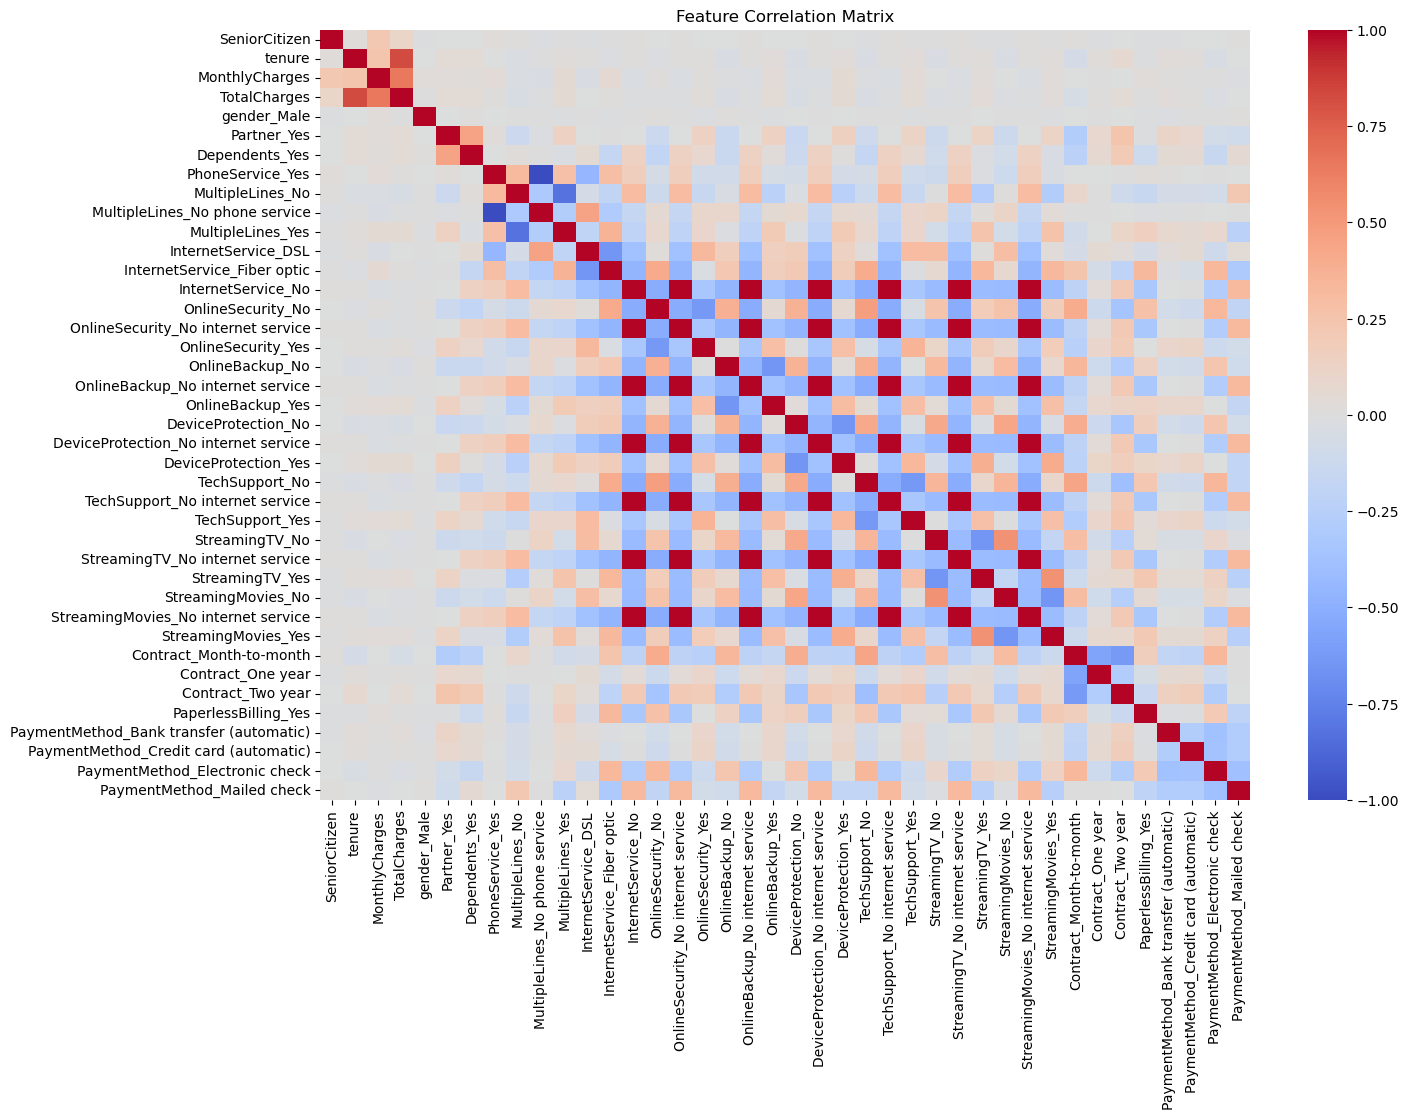

In [20]:
# 1. Heatmap of Correlation Matrix
plt.figure(figsize=(15, 10))
sns.heatmap(X_encoded.corr(), annot=False, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()


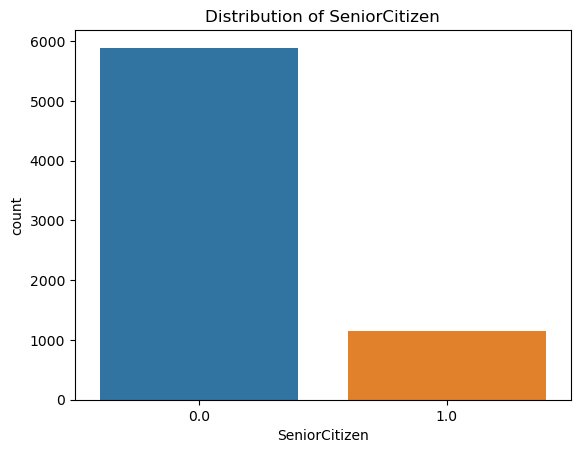

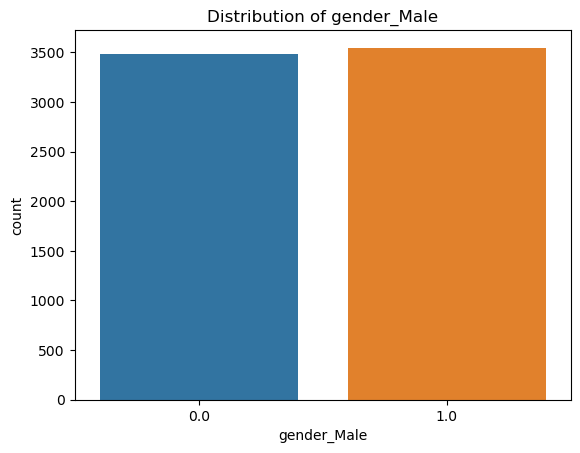

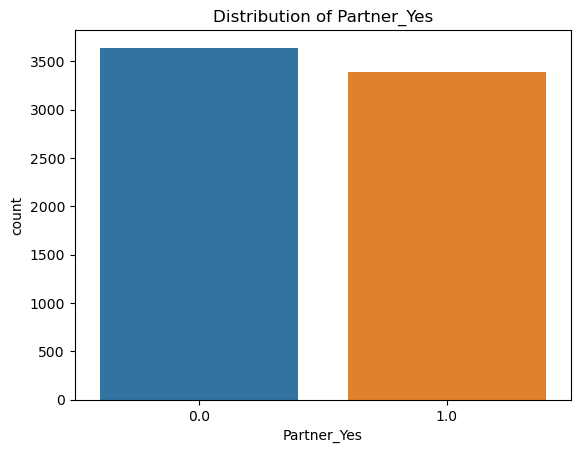

In [21]:
# 2. Count Plots for categorical variables
categorical_vars = ['SeniorCitizen', 'gender_Male', 'Partner_Yes']
for var in categorical_vars:
    sns.countplot(x=var, data=X_encoded)
    plt.title(f'Distribution of {var}')
    plt.show()

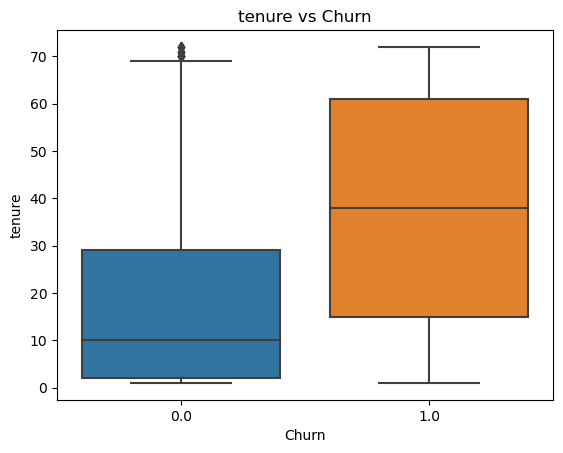

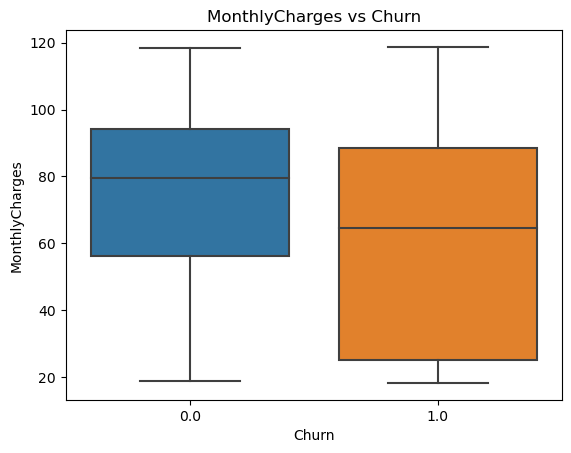

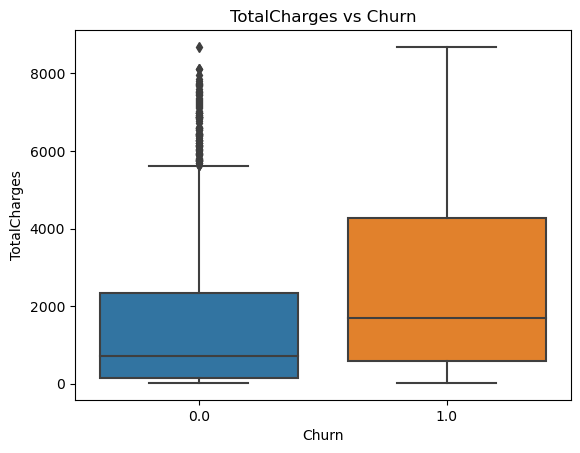

In [23]:
# 3. Box Plots for continuous variables
continuous_vars = ['tenure', 'MonthlyCharges', 'TotalCharges']  # add your continuous variables here
for var in continuous_vars:
    sns.boxplot(x='Churn', y=var, data=pd.concat([X_encoded, y], axis=1))
    plt.title(f'{var} vs Churn')
    plt.show()